# Classification with stumbleupon data

Project 4 has been changed since scraping was untenable. The project now focuses on the stumbleupon kaggle dataset. For more information on this dataset, [check out the website here](https://www.kaggle.com/c/stumbleupon).

---

## 1. Load in the dataset

This is the only part completed for you.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
import patsy
sns.set_style('white')

%matplotlib inline

In [2]:
stumble_upon = pd.read_csv('../dataset/evergreen.tsv', delimiter='\t')

## 2. Clean up/examine your data

Some of the columns may have values that need changing or that are of the wrong type. There could also be columns that aren't very useful.

---

In [3]:
stumble_upon.head(3)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1


In [4]:
stumble_upon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null object
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_r

In [5]:
stumble_upon.alchemy_category.value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [6]:
stumble_upon.groupby('alchemy_category').get_group('?')

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
5,http://www.conveniencemedical.com/genital-herp...,7018,"{""url"":""conveniencemedical genital herpes home...",?,?,119.000000,0.745455,0.581818,0.290909,0.018182,...,?,0,12,?,4368,55,3,0.054545,0.087356,0
7,http://www.insidershealth.com/article/racing_f...,3402,"{""url"":""insidershealth article racing for reco...",?,?,1.883333,0.719697,0.265152,0.113636,0.015152,...,?,0,5,?,27656,132,4,0.068182,0.148551,0
8,http://www.valetmag.com/the-handbook/features/...,477,"{""title"":""Valet The Handbook 31 Days 31 days"",...",?,?,0.471503,0.190722,0.036082,0.000000,0.000000,...,1,0,17,0,2471,194,7,0.644330,0.125000,1
9,http://www.howsweeteats.com/2010/03/24/cookies...,6731,"{""url"":""howsweeteats 2010 03 24 cookies and cr...",?,?,2.410112,0.469325,0.101227,0.018405,0.003067,...,?,1,14,?,11459,326,4,0.236196,0.094412,1
13,http://www.thedailygreen.com/print-this/health...,1063,"{""title"":"" "",""body"":"" "",""url"":""thedailygreen p...",?,?,0.000000,0.000000,0.000000,0.000000,0.000000,...,?,0,0,0,4091,5,11,0.000000,0.083333,1
23,http://www.monicel.info/2008/08/03/original-te...,8945,"{""title"":""Original techniques to tie your shoe...",?,?,4.327655,0.978758,0.895792,0.669138,0.422044,...,1,1,85,0,20757,4990,6,0.992786,0.157954,1
24,http://blogs.babble.com/family-kitchen/2011/04...,2839,"{""title"":"" "",""body"":"" "",""url"":""blogs babble fa...",?,?,1.786408,0.552632,0.149123,0.052632,0.017544,...,1,1,20,0,3760,114,5,0.043860,0.000000,1
28,http://humor.cool-been.com/wp/supermodels-show...,2949,"{""title"":""Supermodels show off their bikini bo...",?,?,3.417910,0.541176,0.270588,0.176471,0.117647,...,1,1,68,0,536,85,6,0.035294,0.159574,1
29,http://sportsillustrated.cnn.com/2011_swimsuit...,4156,"{""title"":""Genevieve Morton Swimsuit by Tyler R...",?,?,1.154762,0.504425,0.427729,0.023599,0.000000,...,?,0,80,?,490,339,4,0.005900,0.033113,1
32,http://www.chicandcharming.com/2008/01/ten-way...,8004,"{""title"":""Ten ways to be Fabulous "",""body"":""On...",?,?,1.292683,0.421965,0.306358,0.011561,0.000000,...,1,0,28,0,2531,173,3,0.202312,0.095116,0


In [40]:
stumble_upon.alchemy_category = stumble_upon.alchemy_category.map(lambda x: x.replace('?', 'unknown'))
stumble_upon.alchemy_category_score = stumble_upon.alchemy_category_score.map(lambda x: np.nan if x == '?' else x)
stumble_upon.is_news = stumble_upon.is_news.map(lambda x: 0 if x == '?' else x) #Kaggle dict says it's 0 or 1
stumble_upon.news_front_page = stumble_upon.news_front_page.map(lambda x: np.nan if x == '?' else x)

stumble_upon.dropna(axis = 0, how = 'any', inplace = True) #NaN values are giving me errors in my CV

In [8]:
#stumble_upon['is_news'].convert_objects(convert_numeric = True)
stumble_upon['is_news'] = pd.to_numeric(stumble_upon['is_news'])

In [9]:
#stumble_upon.news_front_page.unique()
stumble_upon.news_front_page = pd.to_numeric(stumble_upon.news_front_page)

In [10]:
stumble_upon.alchemy_category_score = pd.to_numeric(stumble_upon.alchemy_category_score)

In [11]:
stumble_upon.dtypes

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score            float64
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                             int64
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                   float64
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

In [58]:
stumble_upon_norm = stumble_upon

In [62]:
stumble_upon_norm['news_front_page'][10]

'0'

In [68]:
type(stumble_upon_norm.dtypes)

pandas.core.series.Series

In [97]:
cat_vars = []
for index, col in enumerate(stumble_upon_norm.dtypes):

    if col != (np.float64 or np.int64):
        cat_vars.append(stumble_upon_norm.columns[index])

cat_vars

['url',
 'urlid',
 'boilerplate',
 'alchemy_category',
 'alchemy_category_score',
 'framebased',
 'hasDomainLink',
 'is_news',
 'lengthyLinkDomain',
 'linkwordscore',
 'news_front_page',
 'non_markup_alphanum_characters',
 'numberOfLinks',
 'numwords_in_url',
 'label',
 'title',
 'body']

In [98]:
non_cat_vars = list(set(stumble_upon_norm.columns) - set(cat_vars))

In [99]:
stumble_upon[non_cat_vars]

,parametrizedLinkRatio,spelling_errors_ratio,embed_ratio,frameTagRatio,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,image_ratio,html_ratio
0,-0.790199,-1.198413,0.338451,-1.270594,1.735151,-1.628569,-1.252997,-0.912142,-0.654744,0.048450,-0.139766,-4.208226
1,-0.761322,-1.152094,0.338451,-1.262660,3.357561,-1.797018,-1.170109,-0.745297,-0.533889,0.073316,-0.054997,-4.250568
2,-0.776473,-1.219929,0.338451,-1.288920,2.062478,-1.743024,-1.137174,-0.839046,-0.635638,0.130115,-0.023114,-4.227656
3,-0.901473,-1.176684,0.338451,-1.265507,1.222699,-1.905040,-1.358879,-0.942534,-0.678274,0.085392,-0.108306,-4.188402
4,-0.844375,-1.194973,0.338451,-1.336459,2.356066,-1.805040,-1.236657,-0.835744,-0.635064,0.050810,-0.093176,-4.225170
5,-0.888595,-1.190186,0.338451,-1.341526,118.679595,-1.559585,-0.877061,-0.668292,-0.660092,0.039306,-0.105013,-4.155758
6,-0.394753,-1.213215,0.338451,-1.321799,0.453405,-2.089986,-1.405116,-0.916190,-0.635263,0.184263,0.167728,-4.235080
7,-0.874958,-1.128991,0.338451,-1.334751,1.562929,-1.585343,-1.193727,-0.845564,-0.663122,0.104015,-0.117819,-4.280312
8,-0.298810,-1.152542,0.338451,-1.339662,0.151098,-2.114318,-1.422797,-0.959201,-0.678274,-0.012134,0.992997,-4.339095
9,-0.706944,-1.183130,0.338451,-1.349367,2.089708,-1.835714,-1.357652,-0.940796,-0.675206,0.070526,0.062612,-4.248941


In [87]:
stumble_upon_norm[non_cat_vars].columns
for x in stumble_upon_norm[non_cat_vars].columns:
        stumble_upon_norm[x] = (stumble_upon_norm[x].values - stumble_upon_norm[x].mean()/stumble_upon_norm[x].std())

In [88]:
stumble_upon_norm

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,1.735151,-1.628569,-1.252997,-0.912142,-0.654744,...,24,0,5424,170,8,-0.790199,-1.198413,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.357561,-1.797018,-1.170109,-0.745297,-0.533889,...,40,0,4973,187,9,-0.761322,-1.152094,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.062478,-1.743024,-1.137174,-0.839046,-0.635638,...,55,0,2240,258,11,-0.776473,-1.219929,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.222699,-1.905040,-1.358879,-0.942534,-0.678274,...,24,0,2737,120,5,-0.901473,-1.176684,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.356066,-1.805040,-1.236657,-0.835744,-0.635064,...,14,0,12032,162,10,-0.844375,-1.194973,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...
5,http://www.conveniencemedical.com/genital-herp...,7018,"{""url"":""conveniencemedical genital herpes home...",?,NaN,118.679595,-1.559585,-0.877061,-0.668292,-0.660092,...,12,NaN,4368,55,3,-0.888595,-1.190186,0,Genital Herpes Treatment,Genital herpes is caused by herpes simplex vir...
6,http://gofashionlane.blogspot.tw/2012/06/ameri...,8685,"{""title"":""fashion lane American Wild Child "",""...",arts_entertainment,0.22111,0.453405,-2.089986,-1.405116,-0.916190,-0.635263,...,21,0,1287,93,3,-0.394753,-1.213215,1,fashion lane American Wild Child,Our favorite summer holiday is just around the...
7,http://www.insidershealth.com/article/racing_f...,3402,"{""url"":""insidershealth article racing for reco...",?,NaN,1.562929,-1.585343,-1.193727,-0.845564,-0.663122,...,5,NaN,27656,132,4,-0.874958,-1.128991,0,Racing For Recovery by Dean Johnson racing for...,Racing For Recovery is the growing idea that d...
8,http://www.valetmag.com/the-handbook/features/...,477,"{""title"":""Valet The Handbook 31 Days 31 days"",...",?,NaN,0.151098,-2.114318,-1.422797,-0.959201,-0.678274,...,17,0,2471,194,7,-0.298810,-1.152542,1,Valet The Handbook 31 Days 31 days,Resolutions are for suckers Instead of swearin...
9,http://www.howsweeteats.com/2010/03/24/cookies...,6731,"{""url"":""howsweeteats 2010 03 24 cookies and cr...",?,NaN,2.089708,-1.835714,-1.357652,-0.940796,-0.675206,...,14,NaN,11459,326,4,-0.706944,-1.183130,1,Cookies and Cream Brownies How Sweet It Is,More brownies It seems that I can t get throug...


In [12]:
# for col in stumble_upon.columns:
#     print col

stumble_upon.info()
#stumble_upon.framebased.value_counts()
stumble_upon.alchemy_category.unique()
# del stumble_upon['framebased'] #framebased had nothing but '0' as a value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            5053 non-null float64
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_

array(['business', 'recreation', 'health', 'sports', 'unknown',
       'arts_entertainment', 'science_technology', 'gaming',
       'culture_politics', 'computer_internet', 'law_crime', 'religion',
       'weather'], dtype=object)

## 3. Use statsmodels' logistic regression function to look at variable significance

The **`import statsmodels.formula.api as smf`** code below gives us access to a statsmodels api that can run logistic regressions using patsy-style formulas.

Ex:

```python
formula = 'target ~ var1 + var2 + C(var3) -1'
logreg = smf.logit(formula, data=data)
logreg_results = logreg.fit()
print logreg_results.summary()
```

---

In [13]:
#Statsmodel for numeric and categorical columns

import statsmodels.formula.api as smf

formula = 'label ~  C(alchemy_category) + alchemy_category_score + avglinksize + commonlinkratio_1 \
         + commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio \
         + frameTagRatio + hasDomainLink+html_ratio + is_news + image_ratio + lengthyLinkDomain + linkwordscore\
         + news_front_page + non_markup_alphanum_characters + numberOfLinks \
         + numwords_in_url+parametrizedLinkRatio+spelling_errors_ratio + news_front_page -1' 

logreg = smf.logit(formula, data = stumble_upon)
logreg_results = logreg.fit()
print logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.590459
         Iterations 21
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 4824
Model:                          Logit   Df Residuals:                     4790
Method:                           MLE   Df Model:                           33
Date:                Tue, 17 May 2016   Pseudo R-squ.:                  0.1469
Time:                        19:22:42   Log-Likelihood:                -2848.4
converged:                       True   LL-Null:                       -3338.9
                                        LLR p-value:                9.333e-185
                                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
C(alchemy_category)[arts_entertainment]     0.986

In [14]:
#Statsmodel for numeric columns

import statsmodels.formula.api as smf

formula = 'label ~ avglinksize + commonlinkratio_1 + commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 \
            + compression_ratio + embed_ratio + frameTagRatio + hasDomainLink + html_ratio \
            + image_ratio + is_news + lengthyLinkDomain + linkwordscore + news_front_page \
            + non_markup_alphanum_characters + numberOfLinks + numwords_in_url + parametrizedLinkRatio \
            + spelling_errors_ratio - 1'

logreg = smf.logit(formula, data = stumble_upon)
logreg_results = logreg.fit()
print logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.651574
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 6147
Model:                          Logit   Df Residuals:                     6127
Method:                           MLE   Df Model:                           19
Date:                Tue, 17 May 2016   Pseudo R-squ.:                 0.05921
Time:                        19:22:49   Log-Likelihood:                -4005.2
converged:                       True   LL-Null:                       -4257.3
                                        LLR p-value:                 7.590e-95
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
avglinksize                        0.0022      0.003      0.746     

### 3.1 Run a logistic regression predicting evergreen from the numeric columns

And print out the results as shown in the example above.

---

In [15]:
#Logistic Regression for Evergreen from Numeric Columns

numeric_columns = [col for col in stumble_upon 
                   if (stumble_upon[col].dtype == float or stumble_upon[col].dtype == int) and col != 'urlid']

#print numeric_columns

formula = 'label ~ alchemy_category_score + avglinksize + commonlinkratio_1 + commonlinkratio_2 + commonlinkratio_3 \
        + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio + hasDomainLink + html_ratio \
        + image_ratio + is_news + lengthyLinkDomain + linkwordscore + news_front_page \
        + non_markup_alphanum_characters + numberOfLinks + numwords_in_url + parametrizedLinkRatio \
        + spelling_errors_ratio - 1'

Y, X = patsy.dmatrices(formula, data = stumble_upon)

logreg = LogisticRegression()
logreg = logreg.fit(X, np.ravel(Y))

y_pred = logreg.predict(X)
print logreg.score(X, Y)

0.619195688226


### 3.2 Run a logistic regression predicting evergreen from the numeric columns and a categorical variable of alchemy_category

And print out the results as shown in the example.

---

In [16]:
#Logistic Regression for Evergreen from Numeric Columns and Categorical Column "alchemy_category"

numeric_columns = [col for col in stumble_upon 
                   if (stumble_upon[col].dtype == float or stumble_upon[col].dtype == int) and col != 'urlid']

#print numeric_columns

formula = 'label ~ C(alchemy_category) + alchemy_category_score + avglinksize + commonlinkratio_1 + commonlinkratio_2 \
        + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio + hasDomainLink \
        + html_ratio + image_ratio + is_news + lengthyLinkDomain + linkwordscore + news_front_page \
        + non_markup_alphanum_characters + numberOfLinks + numwords_in_url + parametrizedLinkRatio \
        + spelling_errors_ratio - 1'

Y, X = patsy.dmatrices(formula, data = stumble_upon)

logreg = LogisticRegression()
logreg = logreg.fit(X, np.ravel(Y))

y_pred = logreg.predict(X)
print logreg.score(X, Y)

0.685323383085


## 4. Use sklearn to cross-validate the accuracy of the model above

Normalize the numeric and categorical columns of the predictor matrix.

---

In [18]:
from sklearn.cross_validation import cross_val_score

In [19]:
stumble_upon.columns

Index([u'url', u'urlid', u'boilerplate', u'alchemy_category',
       u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1',
       u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4',
       u'compression_ratio', u'embed_ratio', u'framebased', u'frameTagRatio',
       u'hasDomainLink', u'html_ratio', u'image_ratio', u'is_news',
       u'lengthyLinkDomain', u'linkwordscore', u'news_front_page',
       u'non_markup_alphanum_characters', u'numberOfLinks', u'numwords_in_url',
       u'parametrizedLinkRatio', u'spelling_errors_ratio', u'label'],
      dtype='object')

In [27]:
#Logistic Regression for Evergreen from Numeric Columns

numeric_columns = [col for col in stumble_upon 
                   if (stumble_upon[col].dtype == float or stumble_upon[col].dtype == int) and col != 'urlid']

#print numeric_columns

formula = 'label ~ alchemy_category_score + avglinksize + commonlinkratio_1 + commonlinkratio_2 + commonlinkratio_3 \
        + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio + hasDomainLink + html_ratio \
        + image_ratio + is_news + lengthyLinkDomain + linkwordscore + news_front_page \
        + non_markup_alphanum_characters + numberOfLinks + numwords_in_url + parametrizedLinkRatio \
        + spelling_errors_ratio - 1'

Y, X = patsy.dmatrices(formula, data = stumble_upon)

logreg = LogisticRegression()
logreg = logreg.fit(X, np.ravel(Y))

y_pred = logreg.predict(X)
print logreg.score(X, Y)

0.619195688226


In [41]:
model = LogisticRegression()

predictors = [col for col in stumble_upon 
                   if (stumble_upon[col].dtype == float or stumble_upon[col].dtype == int) 
                       and (col != 'urlid' and col != 'label')]

#print predictors

X = stumble_upon[predictors]

X = stumble_upon[[x for x in stumble_upon.columns if x not in ['url','urlid', 'boilerplate']]]
X = (X-X.mean()) / X.std()

X = X.values
Y = stumble_upon['label']
scores = cross_val_score(model,X,Y,cv=5)
print scores
print np.mean(scores)

//anaconda/lib/python2.7/site-packages/pandas/core/ops.py:990: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 4824
  yrav = yrav[mask]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [34]:
#Logistic Regression for Evergreen from Numeric Columns and Categorical Column "alchemy_category"

numeric_columns = [col for col in stumble_upon 
                   if (stumble_upon[col].dtype == float or stumble_upon[col].dtype == int) and col != 'urlid']

#print numeric_columns

formula = 'label ~ C(alchemy_category) + alchemy_category_score + avglinksize + commonlinkratio_1 + commonlinkratio_2 \
        + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio + hasDomainLink \
        + html_ratio + image_ratio + is_news + lengthyLinkDomain + linkwordscore + news_front_page \
        + non_markup_alphanum_characters + numberOfLinks + numwords_in_url + parametrizedLinkRatio \
        + spelling_errors_ratio - 1'

Y, X = patsy.dmatrices(formula, data = stumble_upon)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.30)

logreg = LogisticRegression()
logreg = logreg.fit(x_train, np.ravel(y_train))

y_pred = logreg.predict(x_test)
print logreg.score(x_test, y_test)

0.680939226519


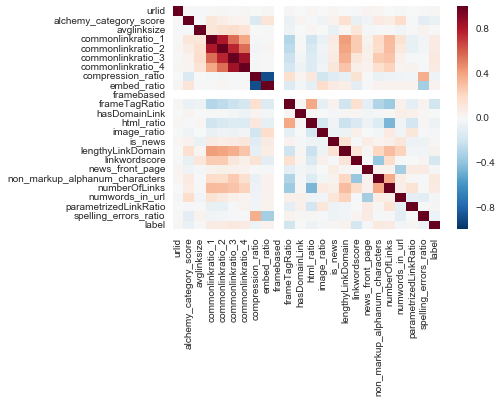

In [220]:
sns.heatmap(stumble_upon.corr())

## 5. Gridsearch regularization parameters for logistic regression

Find the best regularization type (Ridge, Lasso) across a set of regularization strengths.

[NOTE: C is the inverse of the regularization strength. Lower C values are stronger regularization. Having a C higher than 1 will significantly slow down the search. I'm not particularly interested in values over 1, since this is the default regularization strength in LogisticRegression.]

**After you find the best set of parameters, build a Logistic Regression with those parameters and crossvalidate the score.**

[NOTE 2: to run Lasso regularization the solver should be `'liblinear'`]

---

In [32]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [33]:
Cs = [0.2, 2, 20]
logreg = LogisticRegression()

params = {
    "penalty":['l1', 'l2'],
    "C": Cs,
    "fit_intercept": [False, True],
    "class_weight": [None, "balanced"],
    "solver": ['liblinear'],
    "warm_start": [False, True]
}

gs = GridSearchCV(logreg, params, n_jobs=1)

In [35]:
gs.fit(X, Y)
#print clf.best_params_,'\n=====\n', clf.best_score_,'\n=====\n', clf.estimator

IndexError: too many indices for array

## 6. Gridsearch neighbors for kNN

Find the best number of neighbors with your predictors to predict the `label` target variable.

Start by bulding a kNN model with a set number of neighbors, then use gridsearch to run through a series of neighbors.

---

## 7. Choose a new target from alchemy_category to predict with logistic regression

**Ideally your category choice will have a small fraction of the total rows, but not TOO small!**

---

### 7.1 Chose your target category, create the Y vector, and check the fraction of instances

---

### 7.2 Use patsy to create an X matrix of the numeric predictors and all two-way interactions between them

Ex:

```python
import patsy

formula_interactions = '~ (var1 + var2 + var3)**2 -1'
X_interactions = patsy.dmatrix(formula_interactions, data=data
```

Get the column names from the `design_info` property of the patsy X matrix.

---

### 7.3 Normalize the predictor matrix columns

---

### 7.4 Gridsearch a logistic regression to predict accuracy on your new target from the interaction predictors

Include Ridge and Lasso.

---

### 7.5 Build a logistic regression with the optimal parameters, and look at the coefficients

---

### 7.6 Gridsearch parameters for a logistic regression with the same target and predictors, but score based on precision rather than accuracy

Look at the documentation.

---

## [BONUS] 8. Build models predicting from words

This is a bit of the NLP we covered in the pipeline lecture!

---

In [56]:
# create the columns by converting json:
stumble_upon['title'] = stumble_upon.boilerplate.map(lambda x: json.loads(x).get('title', ''))
stumble_upon['body'] = stumble_upon.boilerplate.map(lambda x: json.loads(x).get('body', ''))

# change title and body na columns to blank strings
titles = stumble_upon['title'].fillna('')
body = stumble_upon['title'].fillna('')

titles[0:5]

0    IBM Sees Holographic Calls Air Breathing Batte...
1    The Fully Electronic Futuristic Starting Gun T...
2    Fruits that Fight the Flu fruits that fight th...
3                  10 Foolproof Tips for Better Sleep 
4    The 50 Coolest Jerseys You Didn t Know Existed...
Name: title, dtype: object

### 8.1 Choose 'body' or 'title' from the boilerplate to be the basis of your word predictors

You will need to parse the json from the boilerplate field.

---

In [ ]:
import json

### 8.2 Use CountVectorizer to create your predictor matrix from the string column

It is up to you what range of ngrams and features, and whether or not you want the columns binary or counts.

---

### 8.3 Gridsearch a logistic regression predicting accuracy of your chosen target category from word predictor matrix

---

### 8.4 Do the same as above, but score the gridsearch based on precision rather than accuracy

---

### 8.5 Build a logistic regression with optimal precision categories

Print out the top 20 or 25 word features as ranked by their coefficients.

---